# Домашняя работа

Работаем с отзывами на авиа-компанию:

https://www.kaggle.com/datasets/kanchana1990/singapore-airlines-reviews/data

## Easy

Выбрать метрику.

Удалить пунктуацию из датасета.

Преобразовать датасет в BOW или TF-IDF, поделить на треин-тест и спрогнозировать вашей любимой моделью

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
reviews = pd.read_csv('../data/singapore_airlines_reviews.csv')
reviews

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1
9998,2018-08-05T20:32:03-04:00,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2


- published_date: Date and time of review publication.
- published_platform: Platform where the review was posted.
- rating: Customer satisfaction rating, from 1 (lowest) to 5 (highest).
- type: Specifies the content as a review.
- text: Detailed customer feedback.
- title: Summary of the review.
- helpful_votes: Number of users finding the review helpful.

In [3]:
reviews['type'].unique()

array(['review'], dtype=object)

In [4]:
reviews = reviews.drop(columns=['type'])
reviews

,published_date,published_platform,rating,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1
9996,2018-08-05T22:50:29-04:00,Mobile,5,And again a great Flight with Singapore Air. G...,Best Airline,1
9997,2018-08-05T22:47:06-04:00,Desktop,5,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1
9998,2018-08-05T20:32:03-04:00,Desktop,4,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2


In [5]:
import re

def preprocess_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub('[().,?!-:]', '', text)
    text = text.replace('"', '')
    return text
text = 'Разобьем этот Текст на слова, приведем к нижнему регистру. Затем уберем пунктуацию (точки, запятые и скобки). А потом "найдем слово, которое встречается чаще всего. текст текст текст.'
preprocess_text(text)

'разобьем этот текст на слова приведем к нижнему регистру затем уберем пунктуацию точки запятые и скобки а потом найдем слово которое встречается чаще всего текст текст текст'

In [6]:
reviews['title'] = reviews['title'].apply(preprocess_text)
reviews['text'] = reviews['text'].apply(preprocess_text)
reviews

,published_date,published_platform,rating,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,we used this airline to go from singapore to l...,ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,the service on singapore airlines suites class...,the service in suites class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,booked paid and received email confirmation fo...,don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,best airline in the world seats food service a...,best airline in the world,0
4,2024-03-10T05:34:18-04:00,Desktop,2,premium economy seating on singapore airlines ...,premium economy seating on singapore airlines ...,0
...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,first part done with singapore airlines accep...,flew to nz st half singapore airlines nd half ...,1
9996,2018-08-05T22:50:29-04:00,Mobile,5,and again a great flight with singapore air gr...,best airline,1
9997,2018-08-05T22:47:06-04:00,Desktop,5,we flew business class from frankfurt via sing...,superb service on singapore airlines,1
9998,2018-08-05T20:32:03-04:00,Desktop,4,as always the a aircraft was spotlessly presen...,a comfortable fiight spoiled by lack of adequa...,2


In [7]:
reviews['title_and_text'] = reviews['title']+' '+reviews['text']
reviews

,published_date,published_platform,rating,text,title,helpful_votes,title_and_text
0,2024-03-12T14:41:14-04:00,Desktop,3,we used this airline to go from singapore to l...,ok,0,ok we used this airline to go from singapore t...
1,2024-03-11T19:39:13-04:00,Desktop,5,the service on singapore airlines suites class...,the service in suites class makes one feel lik...,0,the service in suites class makes one feel lik...
2,2024-03-11T12:20:23-04:00,Desktop,1,booked paid and received email confirmation fo...,don’t give them your money,0,don’t give them your money booked paid and rec...
3,2024-03-11T07:12:27-04:00,Desktop,5,best airline in the world seats food service a...,best airline in the world,0,best airline in the world best airline in the ...
4,2024-03-10T05:34:18-04:00,Desktop,2,premium economy seating on singapore airlines ...,premium economy seating on singapore airlines ...,0,premium economy seating on singapore airlines ...
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,first part done with singapore airlines accep...,flew to nz st half singapore airlines nd half ...,1,flew to nz st half singapore airlines nd half ...
9996,2018-08-05T22:50:29-04:00,Mobile,5,and again a great flight with singapore air gr...,best airline,1,best airline and again a great flight with sin...
9997,2018-08-05T22:47:06-04:00,Desktop,5,we flew business class from frankfurt via sing...,superb service on singapore airlines,1,superb service on singapore airlines we flew b...
9998,2018-08-05T20:32:03-04:00,Desktop,4,as always the a aircraft was spotlessly presen...,a comfortable fiight spoiled by lack of adequa...,2,a comfortable fiight spoiled by lack of adequa...


In [8]:
reviews['rating'].unique()

array([3, 5, 1, 2, 4])

<Axes: >

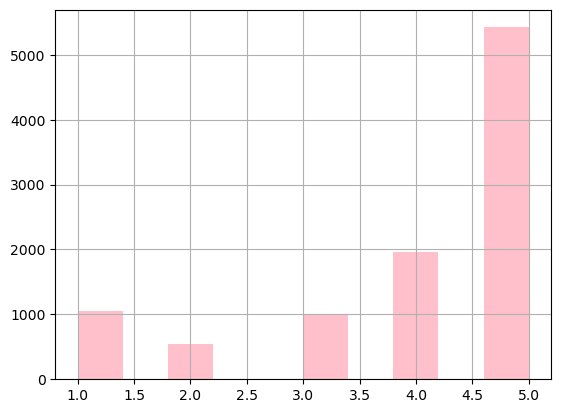

In [9]:
reviews['rating'].hist(color='pink')

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [11]:
train, test = train_test_split(reviews, random_state=42)

In [12]:
bows = [CountVectorizer(), TfidfVectorizer()]
models = [LogisticRegression(), RandomForestClassifier()]
features = [ 'title_and_text', 'title', 'text']
results = []
for bow in bows:
    for m in models:
        for feature in features:
            x_train = bow.fit_transform(train[feature])
            x_test = bow.transform(test[feature])
            y_train = train['rating']
            y_test = test['rating']

            model = m
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            pair = (str(str(feature)+' '+str(m.__class__.__name__)+' '+ str(bow.__class__.__name__)), f1_score(y_pred, y_test, average="weighted"))
            results.append(pair)
            # print(f'feature {feature}, model {m}, {bow}, f1 - {f1_score(y_pred, y_test, average="weighted")}')
best_result = max(results, key=lambda x: x[1])
print(best_result)

('title_and_text LogisticRegression TfidfVectorizer', 0.7227964458432472)


Лучший результат:  берем и заголовок, и сам отзыв, модель - LogisticRegression и TfidfVectorizer

## Normal

Удалить стоп-слова, применить стемминг/лемматизацию. Обучить несколько моделей, подобрать параметры, сделать выводы.

Написать самостоятельно два отзыва - один положительный, один негативный, посмотреть, угадает ли модель.

### уберем стоп-слова

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ekaterinavelicko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [15]:
def delete_stop_words(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(map(str, words)) 

# delete_stop_words('he is the greatest person')

In [16]:
reviews['title'] = reviews['title'].apply(delete_stop_words)
reviews['text'] = reviews['text'].apply(delete_stop_words)
reviews['title_and_text'] = reviews['title_and_text'].apply(delete_stop_words)
reviews

,published_date,published_platform,rating,text,title,helpful_votes,title_and_text
0,2024-03-12T14:41:14-04:00,Desktop,3,used airline go singapore london heathrow issu...,ok,0,ok used airline go singapore london heathrow i...
1,2024-03-11T19:39:13-04:00,Desktop,5,service singapore airlines suites class nothin...,service suites class makes one feel like vip,0,service suites class makes one feel like vip s...
2,2024-03-11T12:20:23-04:00,Desktop,1,booked paid received email confirmation extra ...,don’t give money,0,don’t give money booked paid received email co...
3,2024-03-11T07:12:27-04:00,Desktop,5,best airline world seats food service brillian...,best airline world,0,best airline world best airline world seats fo...
4,2024-03-10T05:34:18-04:00,Desktop,2,premium economy seating singapore airlines nar...,premium economy seating singapore airlines wor...,0,premium economy seating singapore airlines wor...
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,first part done singapore airlines acceptable ...,flew nz st half singapore airlines nd half air...,1,flew nz st half singapore airlines nd half air...
9996,2018-08-05T22:50:29-04:00,Mobile,5,great flight singapore air great unique servic...,best airline,1,best airline great flight singapore air great ...
9997,2018-08-05T22:47:06-04:00,Desktop,5,flew business class frankfurt via singapore br...,superb service singapore airlines,1,superb service singapore airlines flew busines...
9998,2018-08-05T20:32:03-04:00,Desktop,4,always aircraft spotlessly presented boarding ...,comfortable fiight spoiled lack adequate meal ...,2,comfortable fiight spoiled lack adequate meal ...


### стемминг

In [17]:
reviews_st = reviews.copy()

In [18]:
from nltk.stem.porter import *

In [19]:
stemmer = PorterStemmer()

In [20]:
def preprocess_sentence(text):
    words = text.split()
    singles = [stemmer.stem(plural) for plural in words]
    return ' '.join(singles)
# preprocess_sentence('Hello, amazing world and worlds')

In [21]:
reviews_st['title'] = reviews_st['title'].apply(preprocess_sentence)
reviews_st['text'] = reviews_st['text'].apply(preprocess_sentence)
reviews_st['title_and_text'] = reviews_st['title_and_text'].apply(preprocess_sentence)
reviews_st

,published_date,published_platform,rating,text,title,helpful_votes,title_and_text
0,2024-03-12T14:41:14-04:00,Desktop,3,use airlin go singapor london heathrow issu ti...,ok,0,ok use airlin go singapor london heathrow issu...
1,2024-03-11T19:39:13-04:00,Desktop,5,servic singapor airlin suit class noth excel c...,servic suit class make one feel like vip,0,servic suit class make one feel like vip servi...
2,2024-03-11T12:20:23-04:00,Desktop,1,book paid receiv email confirm extra legroom s...,don’t give money,0,don’t give money book paid receiv email confir...
3,2024-03-11T07:12:27-04:00,Desktop,5,best airlin world seat food servic brilliant c...,best airlin world,0,best airlin world best airlin world seat food ...
4,2024-03-10T05:34:18-04:00,Desktop,2,premium economi seat singapor airlin narrow se...,premium economi seat singapor airlin worth money,0,premium economi seat singapor airlin worth mon...
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,first part done singapor airlin accept comfort...,flew nz st half singapor airlin nd half air nz...,1,flew nz st half singapor airlin nd half air nz...
9996,2018-08-05T22:50:29-04:00,Mobile,5,great flight singapor air great uniqu servic o...,best airlin,1,best airlin great flight singapor air great un...
9997,2018-08-05T22:47:06-04:00,Desktop,5,flew busi class frankfurt via singapor brisban...,superb servic singapor airlin,1,superb servic singapor airlin flew busi class ...
9998,2018-08-05T20:32:03-04:00,Desktop,4,alway aircraft spotlessli present board carpet...,comfort fiight spoil lack adequ meal servic,2,comfort fiight spoil lack adequ meal servic al...


In [22]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf']

In [23]:
for kernel in kernels:
    models.append(SVC(kernel=kernel)) 

In [24]:
train, test = train_test_split(reviews_st, random_state=42)

In [25]:
results = []
for bow in bows:
    for m in models:
        for feature in features:
            x_train = bow.fit_transform(train[feature])
            x_test = bow.transform(test[feature])
            y_train = train['rating']
            y_test = test['rating']

            model = m
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            pair = (str(str(feature)+' '+str(m.__class__.__name__)+' '+ str(bow.__class__.__name__)), f1_score(y_pred, y_test, average="weighted"))
            results.append(pair)
            print(f'feature {feature}, model {m}, {bow}, f1 - {f1_score(y_pred, y_test, average="weighted")}')
best_result = max(results, key=lambda x: x[1])
print(best_result)

feature title_and_text, model LogisticRegression(), CountVectorizer(), f1 - 0.6646286381719662
feature title, model LogisticRegression(), CountVectorizer(), f1 - 0.6644173843123737
feature text, model LogisticRegression(), CountVectorizer(), f1 - 0.6328610984604616
feature title_and_text, model RandomForestClassifier(), CountVectorizer(), f1 - 0.716103930250982
feature title, model RandomForestClassifier(), CountVectorizer(), f1 - 0.6429513704304701
feature text, model RandomForestClassifier(), CountVectorizer(), f1 - 0.7097072170295255
feature title_and_text, model SVC(kernel='linear'), CountVectorizer(), f1 - 0.6266714037424783
feature title, model SVC(kernel='linear'), CountVectorizer(), f1 - 0.6632513361414464
feature text, model SVC(kernel='linear'), CountVectorizer(), f1 - 0.6109815017513914
feature title_and_text, model SVC(kernel='poly'), CountVectorizer(), f1 - 0.6668386243699732
feature title, model SVC(kernel='poly'), CountVectorizer(), f1 - 0.6686481365911588
feature text, 

Лучший результат: берем и заголовок, и сам отзыв, модель - SVC и TfidfVectorizer

### лемматизация

In [26]:
import pymorphy3

morph = pymorphy3.MorphAnalyzer()

In [27]:
def lemmatize(text):
    text = text.split()
    text = list(map(lambda x: morph.parse(x)[0].normal_form, text))
    return ' '.join(text)

# lemmatize('дети гуляли по дорожке')


In [28]:
reviews_l = reviews.copy()

In [29]:
reviews_l['title'] = reviews_l['title'].apply(lemmatize)
reviews_l['text'] = reviews_l['text'].apply(lemmatize)
reviews_l['title_and_text'] = reviews_l['title_and_text'].apply(lemmatize)
reviews_l

,published_date,published_platform,rating,text,title,helpful_votes,title_and_text
0,2024-03-12T14:41:14-04:00,Desktop,3,used airline go singapore london heathrow issu...,ok,0,ok used airline go singapore london heathrow i...
1,2024-03-11T19:39:13-04:00,Desktop,5,service singapore airlines suites class nothin...,service suites class makes one feel like vip,0,service suites class makes one feel like vip s...
2,2024-03-11T12:20:23-04:00,Desktop,1,booked paid received email confirmation extra ...,don’t give money,0,don’t give money booked paid received email co...
3,2024-03-11T07:12:27-04:00,Desktop,5,best airline world seats food service brillian...,best airline world,0,best airline world best airline world seats fo...
4,2024-03-10T05:34:18-04:00,Desktop,2,premium economy seating singapore airlines nar...,premium economy seating singapore airlines wor...,0,premium economy seating singapore airlines wor...
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,first part done singapore airlines acceptable ...,flew nz st half singapore airlines nd half air...,1,flew nz st half singapore airlines nd half air...
9996,2018-08-05T22:50:29-04:00,Mobile,5,great flight singapore air great unique servic...,best airline,1,best airline great flight singapore air great ...
9997,2018-08-05T22:47:06-04:00,Desktop,5,flew business class frankfurt via singapore br...,superb service singapore airlines,1,superb service singapore airlines flew busines...
9998,2018-08-05T20:32:03-04:00,Desktop,4,always aircraft spotlessly presented boarding ...,comfortable fiight spoiled lack adequate meal ...,2,comfortable fiight spoiled lack adequate meal ...


In [30]:
train, test = train_test_split(reviews_l, random_state=42)

In [31]:
results = []
for bow in bows:
    for m in models:
        for feature in features:
            x_train = bow.fit_transform(train[feature])
            x_test = bow.transform(test[feature])
            y_train = train['rating']
            y_test = test['rating']

            model = m
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            pair = (str(str(feature)+' '+str(m.__class__.__name__)+' '+ str(bow.__class__.__name__)), f1_score(y_pred, y_test, average="weighted"))
            results.append(pair)
            print(f'feature {feature}, model {m}, {bow}, f1 - {f1_score(y_pred, y_test, average="weighted")}')
best_result = max(results, key=lambda x: x[1])
print(best_result)

feature title_and_text, model LogisticRegression(), CountVectorizer(), f1 - 0.6623878756952924
feature title, model LogisticRegression(), CountVectorizer(), f1 - 0.6642131418577399
feature text, model LogisticRegression(), CountVectorizer(), f1 - 0.6471223071600096
feature title_and_text, model RandomForestClassifier(), CountVectorizer(), f1 - 0.712590135817754
feature title, model RandomForestClassifier(), CountVectorizer(), f1 - 0.6079448643187682
feature text, model RandomForestClassifier(), CountVectorizer(), f1 - 0.7033991385923833
feature title_and_text, model SVC(kernel='linear'), CountVectorizer(), f1 - 0.6277114055163922
feature title, model SVC(kernel='linear'), CountVectorizer(), f1 - 0.6573053974070338
feature text, model SVC(kernel='linear'), CountVectorizer(), f1 - 0.5959109295152579
feature title_and_text, model SVC(kernel='poly'), CountVectorizer(), f1 - 0.6656500513484459
feature title, model SVC(kernel='poly'), CountVectorizer(), f1 - 0.6650917268559084
feature text, 

Лучший результат: берем и заголовок, и сам отзыв, модель - SVC и TfidfVectorizer

### напишем свой отзыв

Итак, ('title_and_text SVC TfidfVectorizer', 0.733658852735338) - это лучший результат (получился после стемминга), возьмем эту модель

In [34]:
train, test = train_test_split(reviews_st, random_state=42)
bow = TfidfVectorizer()
x_train = bow.fit_transform(train['title_and_text'])
x_test = bow.transform(test['title_and_text'])
y_train = train['rating']
y_test = test['rating']

model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [35]:
good_review = 'My recent flight was fantastic. From check-in to touchdown, everything went smoothly. The staff were friendly, the in-flight entertainment was great, and the meals were delicious.'

In [36]:
bad_review = "Not impressed. Check-in was chaotic, cabin crew seemed disinterested,  w'ont be flying with them again"

In [38]:
for review in [good_review, bad_review]:
    review_vectorized = bow.transform([review])
    predicted_rating = model.predict(review_vectorized)
    print("Predicted rating:", predicted_rating)

Predicted rating: [5]
Predicted rating: [5]


на плохой отзыв модель неправильно дала ответ(